In [1]:
import matplotlib.pyplot as plt

def show_object_and_mask(img_obj_RGB, img_obj_alpha):
    
    if img_obj_RGB is not None and img_obj_alpha is not None:
        plt.subplot(1, 2, 1)
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.subplot(1, 2, 2)
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()
    
    elif img_obj_RGB is None:
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()

    else:
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.show()

In [2]:
from augmentation import AugmentationGenerator
from config import config_paste_parameters

auger = AugmentationGenerator(**config_paste_parameters['aug_params'])

initialized and loading cut images ...
load cut images for fob ...


100%|██████████| 24/24 [00:04<00:00,  5.27it/s]


In [ ]:
import numpy as np
import random
import cv2

obj_choice = np.random.randint(0, len(auger.src_imgs))
scale = random.uniform(auger.min_scale_factor, auger.max_scale_factor)

img = auger.img_aug(obj_choice, scale)

show_object_and_mask(img[:, :, :3], img[:, :, 3])

cnts, _ = cv2.findContours((img[:, :, 3].copy()).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(np.vstack(cnts))
img_obj = img[y:y+h, x:x+w]/255

show_object_and_mask(img_obj[:, :, :3], img_obj[:, :, 3])

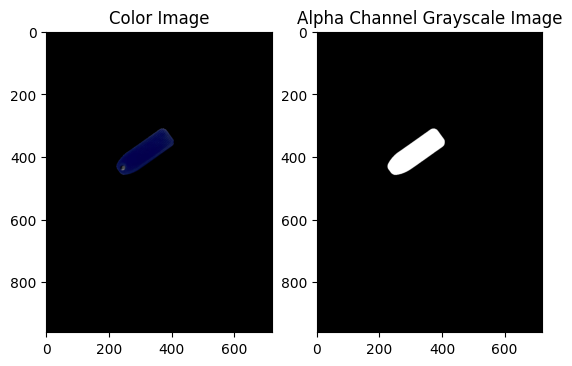

In [7]:
import numpy as np
import random
import cv2
from handling import get_templates

obj_choice = 0
scale = random.uniform(auger.min_scale_factor, auger.max_scale_factor)

img = auger.src_imgs[obj_choice][16]

show_object_and_mask(img[:, :, :3], img[:, :, 3])

In [13]:
contours, _ = cv2.findContours(img[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

angle = rect[2]
width = int(rect[1][0])
height = int(rect[1][1])

print(angle, width, height)

86.53176879882812 151 220


In [14]:
rotation_matrix = cv2.getRotationMatrix2D(tuple(rect[0]), angle, 1)
rotation_matrix

array([[ 6.04950942e-02,  9.98168495e-01,  2.73239461e+02],
       [-9.98168495e-01,  6.04950942e-02,  4.89722563e+02]])

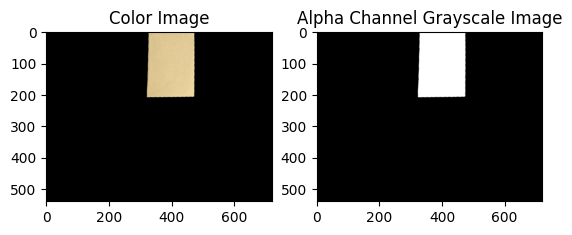

In [15]:
rotated_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

show_object_and_mask(rotated_image[:, :, :3], rotated_image[:, :, 3])

ValueError: zero-size array to reduction operation minimum which has no identity

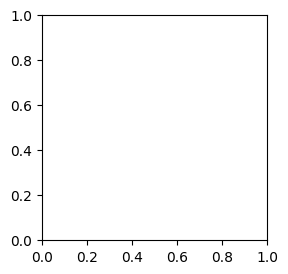

In [16]:
cropped_image = rotated_image[int(rect[0][1]-height/2):int(rect[0][1]+height/2), int(rect[0][0]-width/2):int(rect[0][0]+width/2)]
if cropped_image.shape[0] > cropped_image.shape[1]:
    cropped_image = cv2.transpose(cropped_image)
    cropped_image = cv2.flip(cropped_image, 1)
show_object_and_mask(cropped_image[:, :, :3], cropped_image[:, :, 3])